# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

## I am interested in analyzing civic engagement in SF. For the purposes of this assignment I will look at the most up-to-date results from the recent primary election. I am interested in seeing how different neighborhoods in SF voted. I will be looking at Measure E (expanding police powers) and Measure F (drug screening for services)for this assignment.

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
%matplotlib inline

### Load and clean dataset 1: measure e results from sf department of elections preliminary report 7

In [4]:
raw1 = pd.read_csv('data/measure_e_clean.csv')
data1 = raw1.copy()

In [5]:
data1.head()

,district,registered \nVoters,undervotes,overvotes,yes_total\n,yes_pct,no_total\n,no_pct,total_votes
0,electionwide,500856,9586,92,112564,54.42,94268,45.58,206832
1,bayview hunters point,22730,309,2,3475,61.08,2214,38.92,5689
2,bernal heights,15219,281,1,2934,39.45,4503,60.55,7437
3,castro/upper market,17008,327,2,4214,45.46,5055,54.54,9269
4,chinatown,4041,106,1,766,68.70,349,31.30,1115


In [6]:
# get rid of \n 
data1.columns = data1.columns.str.replace('\n', '')

# Rename columns with the cleaned column names
data1.rename(columns={'registered Voters': 'registered_voters',
                      'yes_total': 'yes_total_e',
                      'yes_pct':'yes_pct_e', 
                      'no_total': 'no_total_e',
                      'no_pct':'no_pct_e',
                      'total_votes':'total_votes_e'}, inplace=True)

data1.head()

,district,registered_voters,undervotes,overvotes,yes_total,yes_pct_e,no_total,no_pct_e,total_votes_e
0,electionwide,500856,9586,92,112564,54.42,94268,45.58,206832
1,bayview hunters point,22730,309,2,3475,61.08,2214,38.92,5689
2,bernal heights,15219,281,1,2934,39.45,4503,60.55,7437
3,castro/upper market,17008,327,2,4214,45.46,5055,54.54,9269
4,chinatown,4041,106,1,766,68.70,349,31.30,1115


In [7]:
# drop columns not needed
data1.drop(columns=['undervotes', 'overvotes'], inplace=True)

In [8]:
#check nulls
data1.isnull().sum()

district             0
registered_voters    0
yes_total            0
yes_pct_e            2
no_total             0
no_pct_e             2
total_votes_e        0
dtype: int64

In [9]:
# drop nas
clean_data1 = data1.dropna()

In [10]:
clean_data1.isnull().sum()

district             0
registered_voters    0
yes_total            0
yes_pct_e            0
no_total             0
no_pct_e             0
total_votes_e        0
dtype: int64

In [11]:
clean_data1.describe()

,registered_voters,yes_total,yes_pct_e,no_total,no_pct_e,total_votes_e
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,24432.000000,5490.926829,55.674390,4598.439024,44.325610,10089.365854
std,76813.359901,17288.270552,7.692493,14480.982042,7.692493,31752.506373
min,913.000000,100.000000,39.450000,92.000000,30.330000,192.000000
25%,6524.000000,1491.000000,50.600000,1080.000000,39.270000,2641.000000
50%,11837.000000,2565.000000,55.760000,1926.000000,44.240000,4471.000000
75%,15836.000000,3504.000000,60.730000,3318.000000,49.400000,6843.000000
max,500856.000000,112564.000000,69.670000,94268.000000,60.550000,206832.000000


In [12]:
clean_data1.shape

(41, 7)

In [13]:
clean_data1.head(41)

,district,registered_voters,yes_total,yes_pct_e,no_total,no_pct_e,total_votes_e
0,electionwide,500856,112564,54.42,94268,45.58,206832
1,bayview hunters point,22730,3475,61.08,2214,38.92,5689
2,bernal heights,15219,2934,39.45,4503,60.55,7437
3,castro/upper market,17008,4214,45.46,5055,54.54,9269
4,chinatown,4041,766,68.70,349,31.30,1115
5,excelsior,18764,3504,57.50,2590,42.50,6094
6,financial district/south beach,11716,2817,64.80,1530,35.20,4347
7,glen park,5785,1605,50.28,1587,49.72,3192
8,haight ashbury,11303,2403,41.22,3426,58.78,5829
9,hayes valley,13879,2565,43.60,3318,56.40,5883


### Visualize the percentage of certain neighborhoods that voted yes on measure e

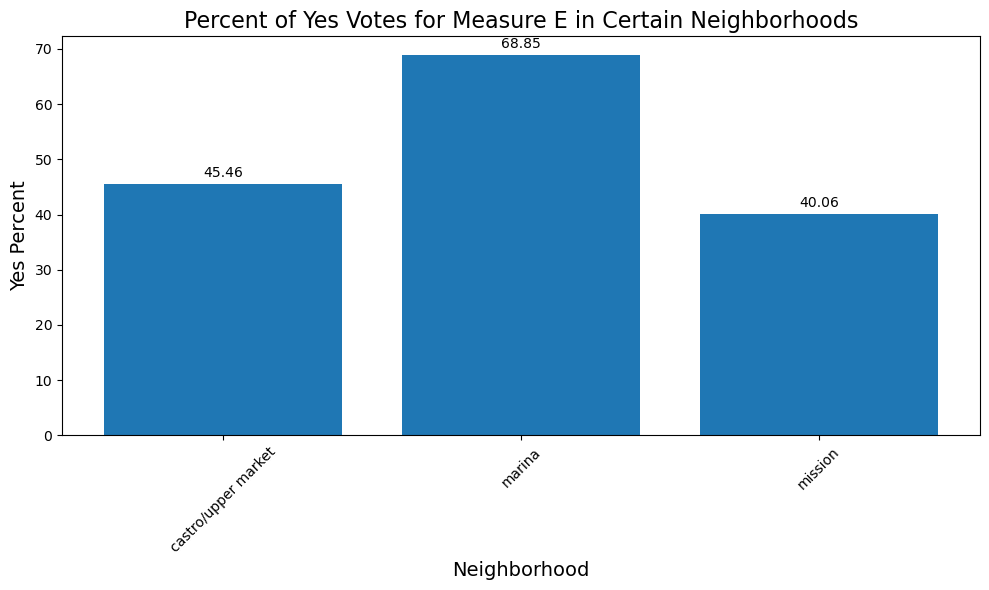

In [22]:
import matplotlib.pyplot as plt

# Filter the data frame to include only the desired neighborhoods
desired_neighborhoods = ['castro/upper market', 'marina', 'mission']
filtered_data = clean_data1[clean_data1['district'].isin(desired_neighborhoods)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
bars = plt.bar(filtered_data['district'], filtered_data['yes_pct_e'])

# Add labels and title
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Yes Percent', fontsize=14)
plt.title('Percent of Yes Votes for Measure E in Certain Neighborhoods', fontsize=16)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate('{:.2f}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()

### Look at results for just castro/upper market (to demonstrate group by)

In [20]:
district_groups = clean_data1.groupby('district')
castro_yes_pct_e = district_groups.get_group('castro/upper market')['yes_pct_e']

# If you want to print the 'yes_pct_e' values for the 'castro/upper market' district
print(castro_yes_pct_e)

3    45.46
Name: yes_pct_e, dtype: float64


### Curious to see which neighborhoods were in the highest/lowest quartiles of voting yes for measure e

In [24]:
import numpy as np

# Calculate the quartiles of yes_pct_e
quartiles = clean_data1['yes_pct_e'].quantile([0.25, 0.5, 0.75])
upper_quartile = quartiles[0.75]

# Create a new column 'high_yes_pct_e' in the data frame
clean_data1['high_yes_pct_e'] = np.where(clean_data1['yes_pct_e'] >= upper_quartile, clean_data1['yes_pct_e'], np.nan)

# Print the districts with high yes_pct_e values
high_yes_pct_e_districts = clean_data1[~clean_data1['high_yes_pct_e'].isna()]['district'].unique()
print("Districts with high yes_pct_e values (upper quartile or higher):")
print(high_yes_pct_e_districts)

Districts with high yes_pct_e values (upper quartile or higher):
['bayview hunters point' 'chinatown' 'financial district/south beach'
 'marina' 'mclaren park' 'mission bay' 'pacific heights' 'portola'
 'presidio heights' 'seacliff' 'visitacion valley']


In [26]:
# Calculate the quartiles of yes_pct_e
quartiles = clean_data1['yes_pct_e'].quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]

# Create a new column 'low_yes_pct_e' in the data frame
clean_data1['low_yes_pct_e'] = np.where(clean_data1['yes_pct_e'] <= lower_quartile, clean_data1['yes_pct_e'], np.nan)

# Print the districts with high yes_pct_e values
low_yes_pct_e_districts = clean_data1[~clean_data1['low_yes_pct_e'].isna()]['district'].unique()
print("Districts with low yes_pct_e values (lower quartile or lower):")
print(low_yes_pct_e_districts)

Districts with low yes_pct_e values (lower quartile or lower):
['bernal heights' 'castro/upper market' 'glen park' 'haight ashbury'
 'hayes valley' 'inner richmond' 'japantown' 'lone mountain/usf' 'mission'
 'noe valley' 'potrero hill']


### Measure E passed the 50% + 1 vote threshhold in some neighborhoods by a lot and, in other neighborhoods, it didn't break 45%. These findings demonstrate an interesting disparity in policy opinions acrosss districts in the city.

## Load and clean dataset 2: measure f results from sf department of elections preliminary report 7

In [27]:
raw2 = pd.read_csv('data/measure_f_clean.csv')
data2 = raw2.copy()
data2.head()

,district,registered_voters,undervotes,overvotes,yes_total,yes_pct,no_total,no_pct,total_votes
0,electionwide,500856,8548,63,121547,58.46,86352,41.54,207899
1,bayview hunters point,22730,284,1,3658,64.01,2057,35.99,5715
2,bernal heights,15219,241,2,3208,42.91,4268,57.09,7476
3,castro/upper market,17008,297,4,4496,48.36,4801,51.64,9297
4,chinatown,4041,93,1,768,68.09,360,31.91,1128


In [28]:
# get rid of \n
data2.columns = data2.columns.str.replace('\n', '')

# Now perform renaming with the cleaned column names
data2.rename(columns={'registered Voters': 'registered_voters',
                      'yes_total': 'yes_total_f',
                      'yes_pct':'yes_pct_f', 
                      'no_total': 'no_total_f',
                      'no_pct':'no_pct_f',
                      'total_votes':'total_votes_f'}, inplace=True)

data2.head()

,district,registered_voters,undervotes,overvotes,yes_total_f,yes_pct_f,no_total_f,no_pct_f,total_votes_f
0,electionwide,500856,8548,63,121547,58.46,86352,41.54,207899
1,bayview hunters point,22730,284,1,3658,64.01,2057,35.99,5715
2,bernal heights,15219,241,2,3208,42.91,4268,57.09,7476
3,castro/upper market,17008,297,4,4496,48.36,4801,51.64,9297
4,chinatown,4041,93,1,768,68.09,360,31.91,1128


In [29]:
data2.drop(columns=['undervotes', 'overvotes'], inplace=True)

In [30]:
#check nulls
data2.isnull().sum()

district             0
registered_voters    0
yes_total_f          0
yes_pct_f            2
no_total_f           0
no_pct_f             2
total_votes_f        0
dtype: int64

In [31]:
clean_data2 = data2.dropna()
clean_data2.isnull().sum()

district             0
registered_voters    0
yes_total_f          0
yes_pct_f            0
no_total_f           0
no_pct_f             0
total_votes_f        0
dtype: int64

In [32]:
clean_data2.describe()

,registered_voters,yes_total_f,yes_pct_f,no_total_f,no_pct_f,total_votes_f
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,24432.000000,5929.121951,59.749268,4212.292683,40.250732,10141.414634
std,76813.359901,18667.644605,7.840214,13267.439039,7.840214,31915.904520
min,913.000000,111.000000,42.910000,81.000000,22.830000,192.000000
25%,6524.000000,1647.000000,55.260000,951.000000,35.990000,2650.000000
50%,11837.000000,2735.000000,60.500000,1722.000000,39.500000,4481.000000
75%,15836.000000,3690.000000,64.010000,3115.000000,44.740000,6897.000000
max,500856.000000,121547.000000,77.170000,86352.000000,57.090000,207899.000000


In [33]:
clean_data2.shape

(41, 7)

In [34]:
clean_data2.head(41)

,district,registered_voters,yes_total_f,yes_pct_f,no_total_f,no_pct_f,total_votes_f
0,electionwide,500856,121547,58.46,86352,41.54,207899
1,bayview hunters point,22730,3658,64.01,2057,35.99,5715
2,bernal heights,15219,3208,42.91,4268,57.09,7476
3,castro/upper market,17008,4496,48.36,4801,51.64,9297
4,chinatown,4041,768,68.09,360,31.91,1128
5,excelsior,18764,3690,60.26,2433,39.74,6123
6,financial district/south beach,11716,3042,69.25,1351,30.75,4393
7,glen park,5785,1718,53.50,1493,46.50,3211
8,haight ashbury,11303,2662,45.33,3210,54.67,5872
9,hayes valley,13879,2808,47.41,3115,52.59,5923


### Visualize the percentage of certain neighborhoods that voted yes on measure e

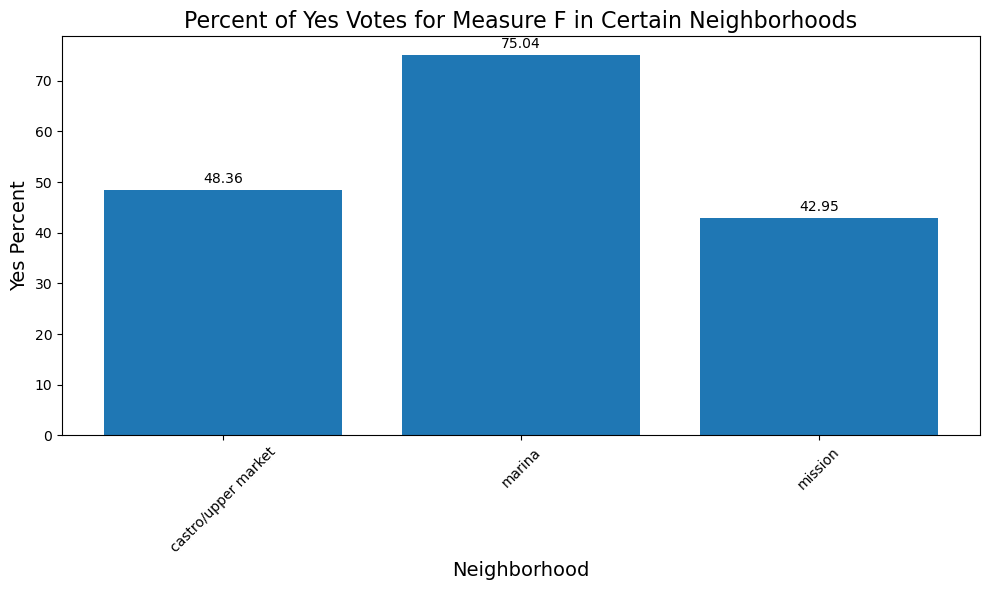

In [35]:
# Filter the data frame to include only the desired neighborhoods
desired_neighborhoods = ['castro/upper market', 'marina', 'mission']
filtered_data = clean_data2[clean_data2['district'].isin(desired_neighborhoods)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
bars = plt.bar(filtered_data['district'], filtered_data['yes_pct_f'])

# Add labels and title
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Yes Percent', fontsize=14)
plt.title('Percent of Yes Votes for Measure F in Certain Neighborhoods', fontsize=16)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate('{:.2f}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()

### Curious to see which neighborhoods were in the highest/lowest quartiles of voting for measure f

In [38]:
# Calculate the quartiles of yes_pct_e
quartiles = clean_data2['yes_pct_f'].quantile([0.25, 0.5, 0.75])
upper_quartile = quartiles[0.75]

# Create a new column 'high_yes_pct_e' in the data frame
clean_data2['high_yes_pct_f'] = np.where(clean_data2['yes_pct_f'] >= upper_quartile, clean_data2['yes_pct_f'], np.nan)

# Print the districts with high yes_pct_e values
high_yes_pct_f_districts = clean_data2[~clean_data2['high_yes_pct_f'].isna()]['district'].unique()
print("Districts with high yes_pct_f values (upper quartile or higher):")
print(high_yes_pct_f_districts)

Districts with high yes_pct_f values (upper quartile or higher):
['bayview hunters point' 'chinatown' 'financial district/south beach'
 'marina' 'mission bay' 'pacific heights' 'presidio heights'
 'russian hill' 'seacliff' 'visitacion valley' 'west of twin peaks']


In [40]:
# Calculate the quartiles of yes_pct_f
quartiles = clean_data2['yes_pct_f'].quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]

# Create a new column 'high_yes_pct_e' in the data frame
clean_data2['low_yes_pct_f'] = np.where(clean_data2['yes_pct_f'] <= lower_quartile, clean_data2['yes_pct_f'], np.nan)

# Print the districts with high yes_pct_e values
low_yes_pct_f_districts = clean_data2[~clean_data2['low_yes_pct_f'].isna()]['district'].unique()
print("Districts with low yes_pct_f values (lower quartile or lower):")
print(low_yes_pct_f_districts)

Districts with low yes_pct_f values (lower quartile or lower):
['bernal heights' 'castro/upper market' 'glen park' 'haight ashbury'
 'hayes valley' 'inner sunset' 'japantown' 'lone mountain/usf' 'mission'
 'noe valley' 'potrero hill']


### Likewise, Measure F passed the 50% + 1 vote threshhold in some neighborhoods by a lot and, in other neighborhoods, it didn't break 45%. It would be interesting to see if these neighborhoods have historically voted these ways, some more coservative and others more progressive.

## Access an API: registered businesses in SF

### This section is intended to show my ability to access an API. I do not plan on using an API for my project so far.

In [41]:
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [42]:
endpoint_url = "https://data.sfgov.org/resource/g8m3-pdis.json"
response = requests.get(endpoint_url)

In [50]:
pd.read_json(endpoint_url).columns

Index(['uniqueid', 'ttxid', 'certificate_number', 'ownership_name', 'dba_name',
       'full_business_address', 'city', 'state', 'business_zip',
       'dba_start_date', 'dba_end_date', 'location_start_date',
       'location_end_date', 'parking_tax', 'transient_occupancy_tax',
       'location', 'data_as_of', 'data_loaded_at', 'mailing_address_1',
       'mail_city', 'mail_zipcode', 'mail_state', 'administratively_closed',
       'supervisor_district', 'neighborhoods_analysis_boundaries',
       ':@computed_region_6qbp_sg9q', ':@computed_region_qgnn_b9vv',
       ':@computed_region_26cr_cadq', ':@computed_region_ajp5_b2md',
       ':@computed_region_jwn9_ihcz', 'naic_code', 'naic_code_description',
       'naics_code_descriptions_list', 'business_corridor', 'lic',
       'lic_code_description', 'lic_code_descriptions_list'],
      dtype='object')

In [51]:
pd.read_json(endpoint_url).head()

,uniqueid,ttxid,certificate_number,ownership_name,dba_name,full_business_address,city,state,business_zip,dba_start_date,...,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,:@computed_region_jwn9_ihcz,naic_code,naic_code_description,naics_code_descriptions_list,business_corridor,lic,lic_code_description,lic_code_descriptions_list
0,0478747-02-999-0478747,0478747-02-999,478747,Gouveia Cathleen,Cathleen Gouveia Design,19 Main St 6,Belvedere,CA,94920.0,2011-12-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1009512-10-141-0467095,1009512-10-141,467095,G & T Communications Corp,Banks Communications,5623 Rosscommon Way,Antioch,CA,94531.0,2012-02-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0412334-01-999-0412334,0412334-01-999,412334,Vulfovich Aleksander L,Vulfovich Aleksander L,2679 Sean Ct,S San Fran,CA,94080.0,2007-01-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0439304-01-999-0439304,0439304-01-999,439304,Wong Ka-Po,Tochi,316 Gateway Dr 226,Pacifica,CA,94044.0,2009-06-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004846-08-141-0458986,1004846-08-141,458986,Vasaturo Tracy J,Traces,225 Locust St,Sausalito,CA,94965.0,2011-05-20T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Load the JSON data into a DataFrame
df = pd.read_json(endpoint_url)

# Display values under the column 'neighborhoods_analysis_boundaries'
print(df['neighborhoods_analysis_boundaries'])

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
995               NaN
996           Mission
997               NaN
998        Tenderloin
999    Inner Richmond
Name: neighborhoods_analysis_boundaries, Length: 1000, dtype: object


## Conclusion

## SF is considered to be a progressive city. I am curious to understand how different neighborhoods voted on Measures E and F. Measure E expands SFPD's police powers, allowing the department to use drones and survielance cameras with facial recognition technology without Board or Commission approval. Measure F ties welfare programs to drug screening. Both Measures passed last week. Eventually, I would like to make a map to visualize results in each neighborhood and show results for other elections by neighborhood. 